In [3]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chapter 4.1: Establishing the Issue
The first stage in the exploratory data analysis (EDA) process is to reinstate our question. The goal of this project is to find cities in Canada with similar population size and population growth rate to Langley, BC, and compare their efforts to lower commuting times across all types of transportation modes. To do this, it is essential that we know what population size and population growth rate Langley has.

In [4]:
# Import combined dataset from Notebook 03.
combined_data = pd.read_csv("../data/processed/cleaned_combined_data.csv")

# Define Langley's population and growth rate
langley_population_2021 = combined_data[combined_data["Geography"] == "Langley"]["Population (2021)"].values[0]
langley_growth_rate = combined_data[combined_data["Geography"] == "Langley"]["Population Percentage Change (2016->2021)"].values[0]

# Display the values
print("Langley's population in 2021: " + str(langley_population_2021))
print("Langley's population growth rate in 2021: " + str(langley_growth_rate))

Langley's population in 2021: 132603.0
Langley's population growth rate in 2021: 13.1


Now that we have the values, we can determine a population and a growth rate range to find cities within. For the purposes of this project, we can determine a simlar population as +/- 50% of Langleys population in 2021, and a growth rate within 5% of Langley's growth rate in 2021.

It is essential that we only get cities that fulfill both of these conditions, as cities with smaller populations might have a very high growth rate, however their infrastructure might be more prepared for that amount of people since they don't have as large of a population to begin with.

In [72]:
# Identify similar cities
similar_cities = combined_data[
    (combined_data["Population (2021)"] >= langley_population_2021 * 0.5) &
    (combined_data["Population (2021)"] <= langley_population_2021 * 1.5) &
    (combined_data["Population Percentage Change (2016->2021)"] >= langley_growth_rate - 5) &
    (combined_data["Population Percentage Change (2016->2021)"] <= langley_growth_rate + 5)
]

# Verify similar cities
print(similar_cities)

# Export similar cities for use in other notebooks
similar_cities.to_csv("../data/processed/similar_cities.csv", index=False)

            Geography  Car_Truck_Van_Less_Than_15  Car_Truck_Van_15_to_29  \
2          Abbotsford                     17450.0                 14690.0   
610        Chilliwack                     10315.0                  8555.0   
639        Clarington                      6185.0                  5955.0   
1349           Guelph                     17890.0                 16560.0   
1571         Kamloops                     12660.0                 12275.0   
1885          Langley                      6527.5                  9895.0   
2082      Maple Ridge                      6540.0                  4990.0   
2361          Nanaimo                     16837.5                 12600.0   
2408  New Westminster                      2660.0                  6175.0   
2592           Oshawa                     11460.0                 11905.0   
2706        Pickering                      5035.0                  7110.0   

      Car_Truck_Van_30_to_44  Car_Truck_Van_45_to_59  \
2                  

This is great! We've found 11 cities, including Langley, that are within our constraints. We exported these cities in .csv format for use in the next section of this project, "Clustering and Modelling", but we are going to do a bit of exploratory analysis with the dataset here first. 

Let's make a new dataset of just these values (so far we've only filtered the dataset, not created a new dataset) so that we can work with just these 11 cities. The next thing we will do is calculate summary statistics for the commuting times of all the various cities.

In [19]:
# Filter population-related columns
population_columns = [
    "Population (2021)", 
    "Population (2016)", 
    "Population Percentage Change (2016->2021)", 
    "Land area (2021) (km^2)", 
    "Population density per km^2 (2021)"
]
print(population_columns)

['Population (2021)', 'Population (2016)', 'Population Percentage Change (2016->2021)', 'Land area (2021) (km^2)', 'Population density per km^2 (2021)']


In [20]:
# Filter commuting-related columns
commuting_columns = [
    col for col in similar_cities.columns 
    if col.endswith("_Avg_Duration") and col not in population_columns
]
print(commuting_columns)

['Car_Truck_Van_Avg_Duration', 'Public_Transit_Avg_Duration', 'Active_Transportation_Avg_Duration', 'Motorcycle_Scooter_Moped_Avg_Duration', 'Other_Avg_Duration']


In [22]:
# Show summary statistics for commuting columns
print(similar_cities[commuting_columns].describe())

       Car_Truck_Van_Avg_Duration  Public_Transit_Avg_Duration  \
count                   11.000000                    11.000000   
mean                    20.704545                    35.718182   
std                      3.322684                     6.146636   
min                     16.150000                    28.000000   
25%                     18.450000                    31.025000   
50%                     20.500000                    34.100000   
75%                     22.600000                    39.400000   
max                     25.900000                    47.000000   

       Active_Transportation_Avg_Duration  \
count                           11.000000   
mean                            13.154545   
std                              1.754488   
min                              9.200000   
25%                             12.425000   
50%                             13.200000   
75%                             14.350000   
max                             15.800000   


We can now begin visualizing our data. We will do this with a focus mainly on the averaged durations for each transportation method (e.g., "Car_Truck_Van_Avg_Duration). First, we have to remove the population-related data. While this data will be important, right now we are looking at general commuting-related data.

In [24]:
# Write custom labels for the graphs
mode_labels = [
    "Car/Truck/Van",
    "Public Transit",
    "Active Transportation",
    "Motorcycle/Scooter",
    "Other"
]
print(mode_labels)

['Car/Truck/Van', 'Public Transit', 'Active Transportation', 'Motorcycle/Scooter', 'Other']


In [26]:
print(similar_cities[commuting_columns].mean())

Car_Truck_Van_Avg_Duration               20.704545
Public_Transit_Avg_Duration              35.718182
Active_Transportation_Avg_Duration       13.154545
Motorcycle_Scooter_Moped_Avg_Duration    14.218182
Other_Avg_Duration                       10.286364
dtype: float64


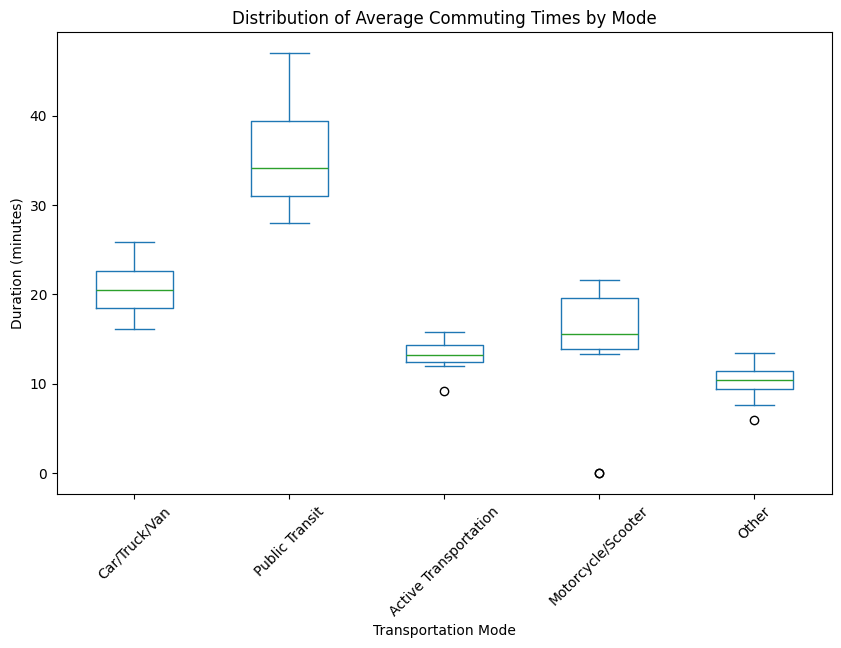

In [39]:
# Create box plots for average duration columns
similar_cities[commuting_columns].plot(kind="box", figsize=(10, 6), title="Distribution of Average Commuting Times by Mode")
plt.ylabel("Duration (minutes)")
plt.xlabel("Transportation Mode")

# Align x-axis labels with the positions of the box plots
plt.xticks(ticks=range(1, len(commuting_columns) + 1), labels=mode_labels, rotation=45)

plt.show()

This box plot illustrates the minimum, maximum, and average commuting times for various transportation modes.

Commuters using public transit experience significantly longer commuting times, often over double that of other modes. This could result from inadequate public transportation infrastructure or limited transit routes near commuters' starting and ending points. Additionally, the wide variance and extended maximum times highlight inconsistencies in public transit reliability and accessibility.

In contrast, active transportation (e.g., walking or biking) shows notably short commuting times with minimal variance. This is likely because most individuals using active transportation live close to their workplaces. The uniformity in commuting times suggests that active transportation is less influenced by external factors, though lacking infrastructure, such as sidewalks or bike lanes, may still pose challenges.

Next, we can compare Langley to the other 10 cities that fit our criteria. Let's see how Langley's average commuting times compare to the overall average from the other cities.

In [32]:
# Isolate Langley's data
langley_data = similar_cities[similar_cities["Geography"] == "Langley"].iloc[0]
print(langley_data)

Geography                                     Langley
Car_Truck_Van_Less_Than_15                     6527.5
Car_Truck_Van_15_to_29                         9895.0
Car_Truck_Van_30_to_44                         5785.0
Car_Truck_Van_45_to_59                         1897.5
Car_Truck_Van_More_Than_60                      745.0
Car_Truck_Van_Avg_Duration                       22.6
Public_Transit_Less_Than_15                     107.5
Public_Transit_15_to_29                         297.5
Public_Transit_30_to_44                         395.0
Public_Transit_45_to_59                         260.0
Public_Transit_More_Than_60                     452.5
Public_Transit_Avg_Duration                     43.05
Active_Transportation_Less_Than_15              807.5
Active_Transportation_15_to_29                  335.0
Active_Transportation_30_to_44                   90.0
Active_Transportation_45_to_59                   17.5
Active_Transportation_More_Than_60                5.0
Active_Transportation_Avg_Du

In [34]:
# Calculate averages for other cities
similar_cities_no_langley = similar_cities[similar_cities["Geography"] != "Langley"]

# Compute commuting time averages for similar cities excluding Langley
similar_cities_avg = similar_cities_no_langley[commuting_columns].mean()
print(similar_cities_avg)

Car_Truck_Van_Avg_Duration               20.515
Public_Transit_Avg_Duration              34.985
Active_Transportation_Avg_Duration       13.215
Motorcycle_Scooter_Moped_Avg_Duration    13.590
Other_Avg_Duration                       10.235
dtype: float64


In [38]:
# Get Langley's average commuting durations by transportation mode
langley_avg = langley_data[commuting_columns].values
print(langley_avg)

[np.float64(22.6) np.float64(43.05) np.float64(12.55) np.float64(20.5)
 np.float64(10.8)]


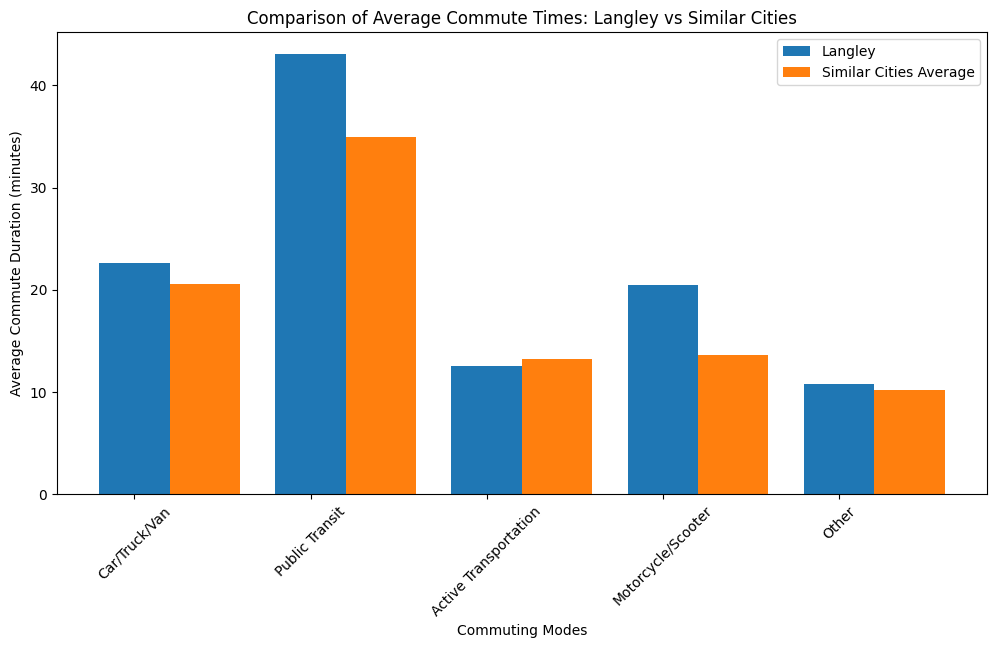

In [73]:
# Create bar plot for comparison
x = range(len(commuting_columns))
plt.figure(figsize=(12, 6))
plt.bar(x, langley_avg, width=0.4, label="Langley", align="center")
plt.bar([i + 0.4 for i in x], similar_cities_avg.values, width=0.4, label="Similar Cities Average", align="center")

# Customize the plot
plt.xticks(ticks=x, labels=mode_labels, rotation=45)
plt.ylabel("Average Commute Duration (minutes)")
plt.xlabel("Commuting Modes")
plt.title("Comparison of Average Commute Times: Langley vs Similar Cities")
plt.legend()
plt.show()

Very clearly, we can see that most methods of commuting, except for Active Transportation, are slower in Langley. 


Next, we'd like to find if theres a correlation between the commuting times and population metrics. Let's use a heatmap to visualize the correlation between average commuting times (for all commuting mdoes) and the population-related metrics: population size, population density, and population growth rate.

In [41]:
# Select relevant columns for correlation matrix
correlation_columns = commuting_columns + [
    "Population (2021)",
    "Population density per km^2 (2021)",
    "Population Percentage Change (2016->2021)"
]

# Filter the dataset to only include the selected columns
correlation_data = similar_cities[correlation_columns]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                                           Car_Truck_Van_Avg_Duration  \
Car_Truck_Van_Avg_Duration                                   1.000000   
Public_Transit_Avg_Duration                                  0.882822   
Active_Transportation_Avg_Duration                          -0.014499   
Motorcycle_Scooter_Moped_Avg_Duration                       -0.272846   
Other_Avg_Duration                                           0.530442   
Population (2021)                                           -0.076403   
Population density per km^2 (2021)                           0.417302   
Population Percentage Change (2016->2021)                    0.112183   

                                           Public_Transit_Avg_Duration  \
Car_Truck_Van_Avg_Duration                                    0.882822   
Public_Transit_Avg_Duration                                   1.000000   
Active_Transportation_Avg_Duration                           -0.018786   
Motorcycle_Scooter_Moped_Avg_Duration         

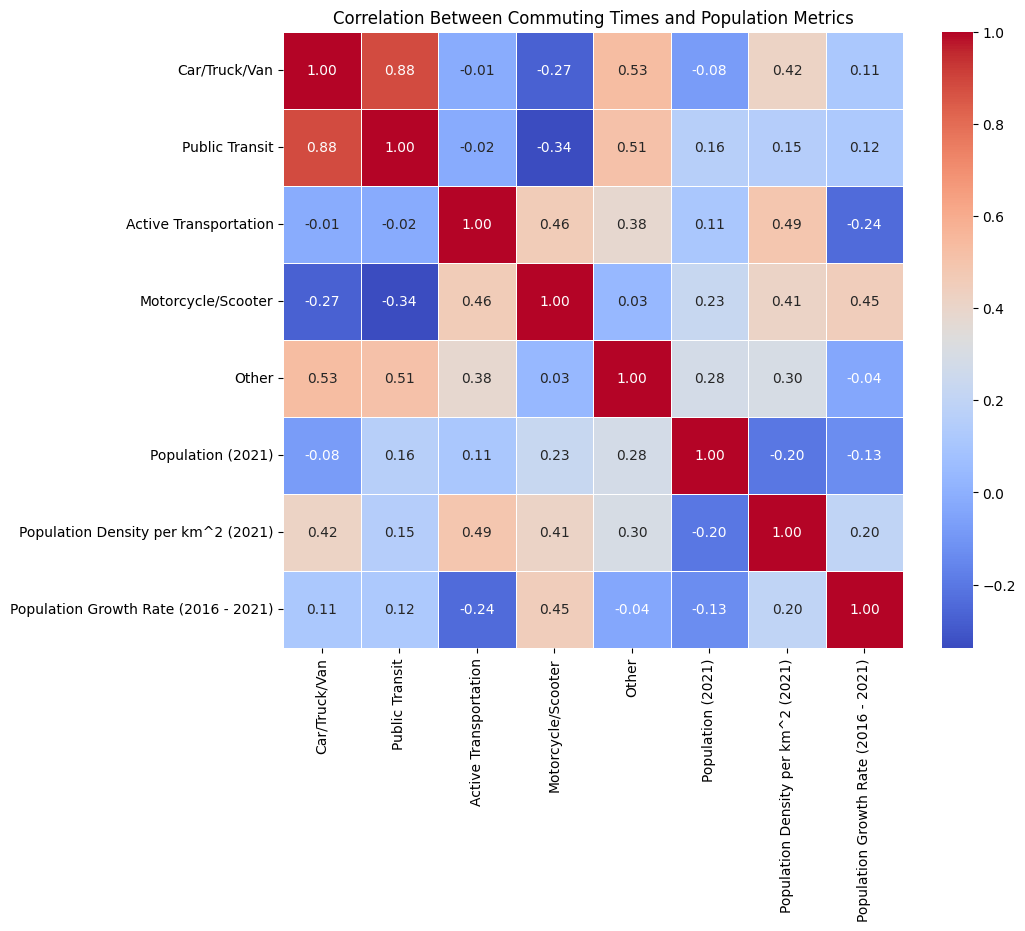

In [42]:
# Write custom labels for the axis of the heatmap
axis_labels = ["Car/Truck/Van", "Public Transit", "Active Transportation", "Motorcycle/Scooter", "Other", "Population (2021)",
              "Population Density per km^2 (2021)", "Population Growth Rate (2016 - 2021)"]

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5, xticklabels=axis_labels, yticklabels=axis_labels)
plt.title("Correlation Between Commuting Times and Population Metrics")
plt.show()

This heatmap is used to the Spearman's Rank correlation between the various commuting-metrics and the population-metrics. Spearman's Rank coefficient can be interpreted as follows:

+1.0 : Perfect positive correlation 

0.0 : No correlation

-1.0 : Perfect negative correlation (inverse relationship)

Values closer to 1.0 or -1.0 represent strong relationships, while values closer to 0 represent weak relationships.

Surprisingly, there seems to be very little correlation between the two types of metrics (commuting and population). The highest value correlation lies between Car/Truck/Van's average commuting times and public transit average commuting times, with a value of 0.88. This is significant, and makes sense, seeing as that public transit uses the same roads (for the most part) as the rest of the common traffic.

### Recommendations and City Comparisons
The first part of this section of the exploratory data analysis is to analyze cities with better commuting times for each mode of transportation. By assessing the city with the shortest commuting time for each transportation mode, we can optimize the best commuting strategies that can be implemented into Langley to combat the growing issue of commuting times as the city's population grows.

In [44]:
# Analyze and compare Langley's data with the top cities
for mode, data in best_cities.items():
    mode_name = column_to_mode_mapping[mode] # Change the name to more proper version
    print(f"Best city for {mode_name}: {data['City']} with {data['Duration']} minutes. Data comparison between Langley and {data['City']}:")

    # Extract relevant columns: the specific mode and population data for Langley + most efficient city
    relevant_columns = ["Geography", mode, "Population (2021)", "Population (2016)", 
                        "Population Percentage Change (2016->2021)", "Population density per km^2 (2021)"]
    
    # Extract data for the best city and Langley
    best_city_data = combined_data[combined_data["Geography"] == data["City"]][relevant_columns]
    langley_data = combined_data[combined_data["Geography"] == "Langley"][relevant_columns]

    # Combine data for comparison
    comparison = pd.concat([best_city_data, langley_data])
    print(comparison)
    print("\n")

Best city for Car/Truck/Van: Nanaimo with 16.15 minutes. Data comparison between Langley and Nanaimo:
     Geography  Car_Truck_Van_Avg_Duration  Population (2021)  \
2361   Nanaimo                       16.15            99863.0   
1885   Langley                       22.60           132603.0   

      Population (2016)  Population Percentage Change (2016->2021)  \
2361            90504.0                                       10.3   
1885           117285.0                                       13.1   

      Population density per km^2 (2021)  
2361                              1104.1  
1885                               431.6  


Best city for Public Transit: Chilliwack with 28.0 minutes. Data comparison between Langley and Chilliwack:
       Geography  Public_Transit_Avg_Duration  Population (2021)  \
610   Chilliwack                        28.00            93203.0   
1885     Langley                        43.05           132603.0   

      Population (2016)  Population Percentage 

Now that we know the best cities for each type of transportation mode, we can do individual investigation into these cities to find out why their commuting times might be lower despite the population. Also, because the correlation between public transit and automobile traffic is very high, we can look at why Nanaimo has fast automobile commuting times yet Chilliwack has faster public transit commuting times.

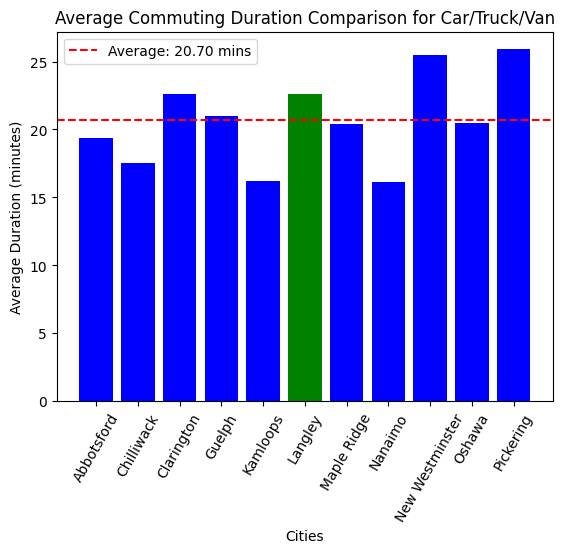

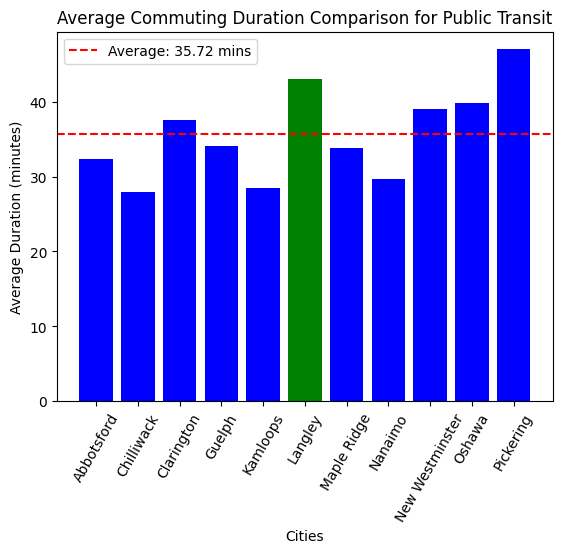

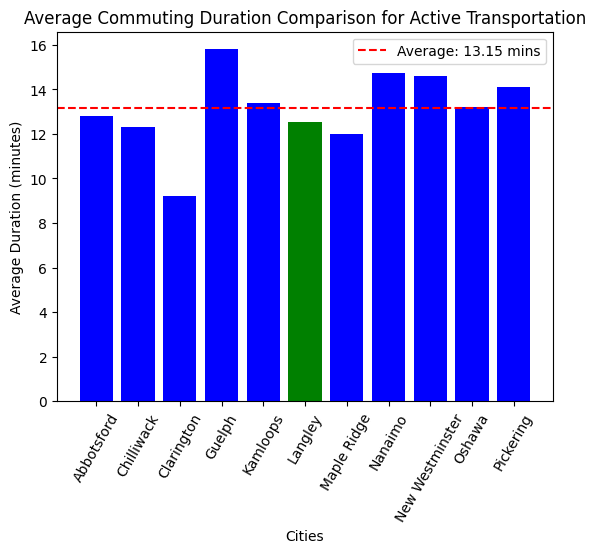

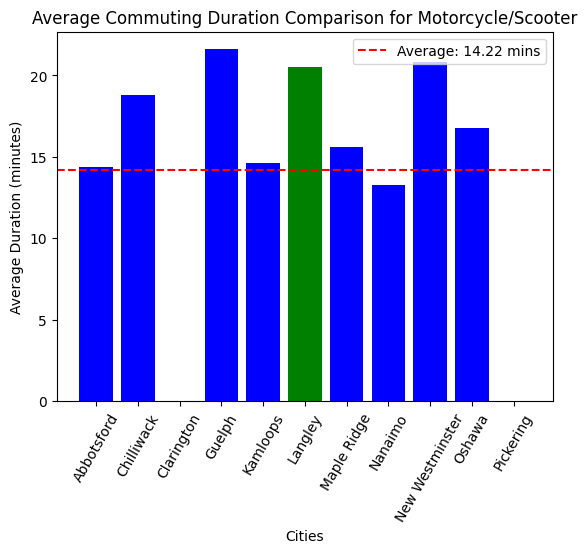

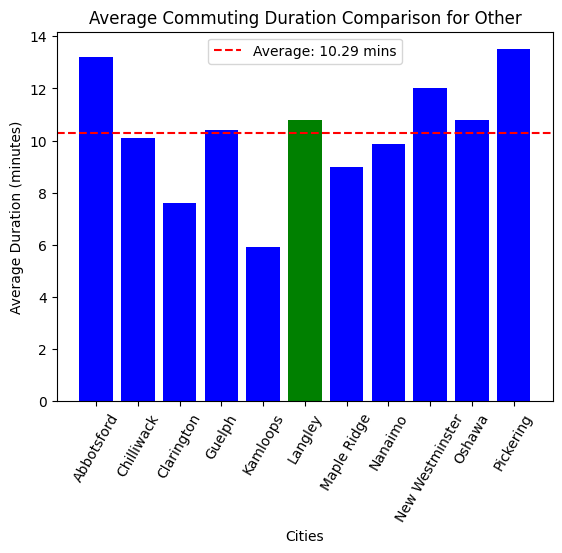

In [71]:
# Bar Graph of each transportation mode. Average Commuting Time vs. City with average across the bar graph
for mode, label in zip(commuting_columns, mode_labels):
    cities = similar_cities["Geography"].values
    duration = similar_cities[mode].values
    avg_duration = np.mean(duration)

    colors = ['green' if city == 'Langley' else 'blue' for city in cities]
    
    plt.bar(cities, duration, color=colors)
    plt.axhline(y=avg_duration, color='red', linestyle='--', label=f'Average: {avg_duration:.2f} mins')
    plt.title(f'Average Commuting Duration Comparison for {label}')
    plt.xlabel("Cities")
    plt.xticks(rotation=60)
    plt.ylabel("Average Duration (minutes)")
    plt.legend()
    plt.show()
    